In [2]:
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib.patches as mp
import seaborn as sns
    
plt.rcParams["font.family"] = "Arial"
plt.rcParams['svg.fonttype'] = 'none'

In [1]:
import scanpy as sc
import decoupler as dc
import pandas as pd
import numpy as np
from loguru import logger

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
sys.path.append('/home/mowp/workspace/mowp_scripts/tools')

import os
os.environ['R_HOME'] = '/home/mowp/mambaforge/envs/sc/lib/R'

import sctk

In [9]:
# Generate example dataframes for demonstration
# Value DataFrame
value_data = {
    'Cancer cell': [1.2, 3.4, 2.1, 5.5, 0.8],
    'CD8+ T-cell': [2.2, 1.8, 3.1, 0.9, 4.5],
    'DC': [1.5, 2.3, 0.7, 4.8, 3.2],
    'Macrophage': [3.3, 0.6, 1.9, 2.5, 4.1],
    'Fibroblast': [0.9, 1.2, 3.6, 2.0, 4.7],
    'Endothelial': [1.0, 3.0, 4.0, 2.0, 5.0]
}
value_df = pd.DataFrame(value_data, index=['Process A', 'Process B', 'Process C', 'Process D', 'Process E'])

# P-value DataFrame
pvalue_data = {
    'Cancer cell': [0.0001, 0.05, 0.02, 0.03, 0.06],
    'CD8+ T-cell': [0.02, 0.003, 0.01, 0.0004, 0.05],
    'DC': [0.03, 0.02, 0.06, 0.01, 0.05],
    'Macrophage': [0.05, 0.06, 0.0004, 0.03, 0.02],
    'Fibroblast': [0.04, 0.05, 0.003, 0.002, 0.01],
    'Endothelial': [0.03, 0.01, 0.02, 0.04, 0.005]
}
pvalue_df = pd.DataFrame(pvalue_data, index=['Process A', 'Process B', 'Process C', 'Process D', 'Process E'])

In [10]:
value_df

,Cancer cell,CD8+ T-cell,DC,Macrophage,Fibroblast,Endothelial
Process A,1.2,2.2,1.5,3.3,0.9,1.0
Process B,3.4,1.8,2.3,0.6,1.2,3.0
Process C,2.1,3.1,0.7,1.9,3.6,4.0
Process D,5.5,0.9,4.8,2.5,2.0,2.0
Process E,0.8,4.5,3.2,4.1,4.7,5.0


In [16]:
pvalue_df

,Cancer cell,CD8+ T-cell,DC,Macrophage,Fibroblast,Endothelial
Process A,0.0001,0.0200,0.03,0.0500,0.040,0.030
Process B,0.0500,0.0030,0.02,0.0600,0.050,0.010
Process C,0.0200,0.0100,0.06,0.0004,0.003,0.020
Process D,0.0300,0.0004,0.01,0.0300,0.002,0.040
Process E,0.0600,0.0500,0.05,0.0200,0.010,0.005


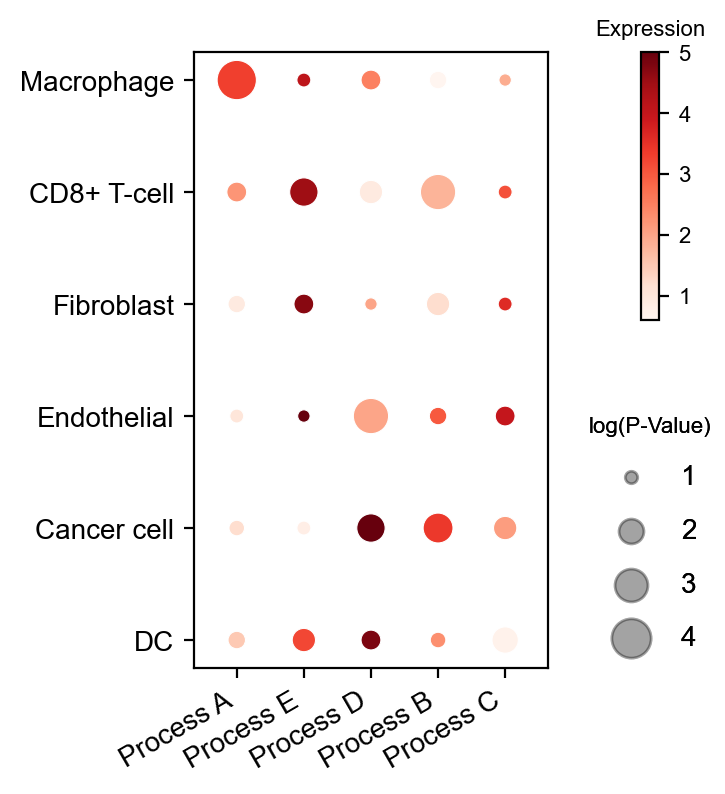

In [17]:
sctk.pl.DotPlot(value_df, pvalue_df).plot(
    row_cluster=True,
    col_cluster=True,
    wspace=.5,
    hspace=.3,
    vmax=5, vmin=0,
    figsize=(3, 4),
    sizes=(20, 200),
    cbar_title='Expression',
    size_title='log(P-Value)',
    rotation=30)